## Data Analysis of Electric Vehicles

## 1. Import Libraries

In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset

In [578]:
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

Data "Electric Vehicle Population Dataset" from Kaggle 

In [579]:
# Finding size of datatset
df.shape

(166800, 17)

In [580]:
# Get all columns
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [581]:
# Dropping columns that are irrelivant to my questions
df = df.drop(["DOL Vehicle ID","County","City", "Legislative District", "Postal Code", "Vehicle Location", "Electric Utility", "State"], axis=1)
df.columns


Index(['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', '2020 Census Tract'],
      dtype='object')

The model year is what year the model is from. The make is the company who made the car and the model is the car model usually a number or word. The electric range is the distance the car can go on one electric charge. The base MSRP is the set cost of the car with no extra features or customization.

In [582]:
# Find number of duplicates
df.duplicated().sum()

18714

In [583]:
# Remove all duplicates
df = df.drop_duplicates()

In [584]:
df.duplicated().sum()

0

In [585]:
# Finds the amount of duplicates for every model that may contain different values in other columns 
# so they would not be originally considered duplicates
df.duplicated(["Model"]).sum()


147948

In [586]:
# Removes duplicates for every model
df = df.drop_duplicates(["Model"])

In [587]:
df.duplicated(["Model"]).sum()

0

In [588]:
# Checks for null values
df.isna().sum()

VIN (1-10)                                           0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
2020 Census Tract                                    0
dtype: int64

## Section 1: Electric range
What were top electric ranges of the cars by model and how does it compare when looking at the most expensive cars?

In [589]:
# Average electric range of the cars
avg_range  = df["Electric Range"].mean()
print(avg_range)

40.26086956521739


In [590]:
# Sorts the data to be by electric range in descending order
# Done so I could compare the top cars by electric range
df = df.sort_values(["Electric Range"], ascending=False, ignore_index=False).reset_index(drop=True)
# Gets the models with the top 5 highest electric ranges
models = df["Model"].head(5)


Answering the first half of my first question, here were the top 5 models by electric range. The Model 3 being having the highest electric range out of the 5 at around 320 miles and I-Pace Bolt EV and NIRO models being tied at the lowest of the 5 at around 240 miles.

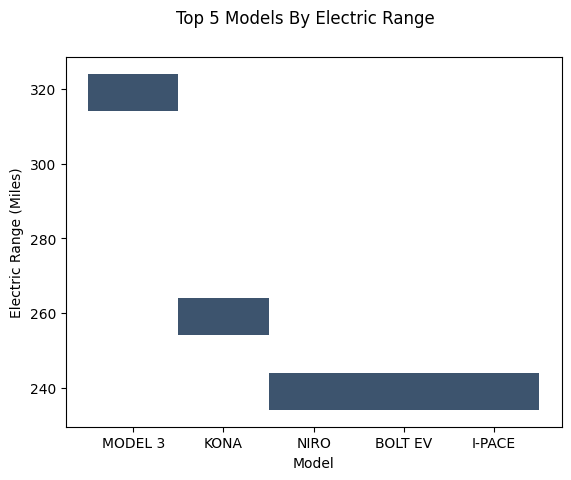

In [591]:
# Histogram of the top 5 models and their electric ranges
sns.histplot(data=df, x= models, y= "Electric Range", binwidth =10)
plt.suptitle("Top 5 Models By Electric Range")
plt.ylabel("Electric Range (Miles)")
plt.show()

## Section 2: Price (Base MSRP)
What were most and least expensive cars?
Also includes answers to second half of first question.

In [592]:
# Average price of the cars
avg_price = df['Base MSRP'].mean()
print(avg_price)

11087.210144927536


In [593]:
# The range of prices
price_range = df['Base MSRP'].max() - df['Base MSRP'].min()
print(price_range)

845000


Here are the Base MSRP's of each car by model.

In [594]:
# Sort the data to be by Base MSRP in ascending order
df = df.sort_values(["Base MSRP"], ascending=True, ignore_index=False).reset_index(drop=True)

This scatterplot answers my second question showing the Base MSRPs for every model

Text(0, 0.5, 'Base MSRP (USD)')

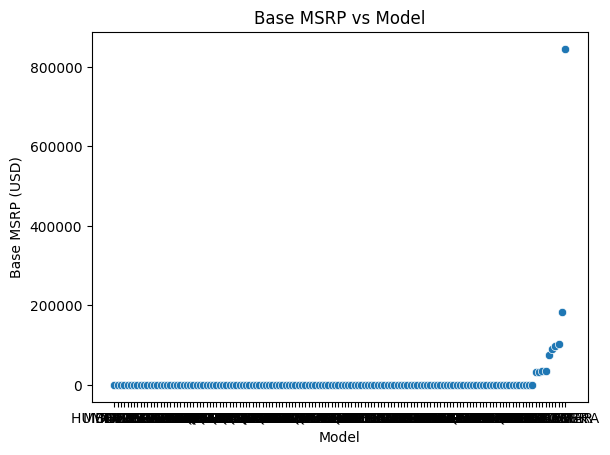

In [595]:
# Scatter plot of Base MSRP by car model
plt.title("Base MSRP vs Model")
sns.scatterplot(data=df, x= "Model", y="Base MSRP")
plt.ylabel("Base MSRP (USD)")

In [596]:
# Checking all of the models with a Base MSRP less than 20000
# Done because many cars in the scatter plot seem to have a base MSRP close to or equal to zero 
print(df.loc[df['Base MSRP'] < 20000])

     VIN (1-10)  Model Year        Make     Model  \
0    5YJ3E1EB8L        2020       TESLA   MODEL 3   
1    KNDAEFS5XR        2024         KIA       EV9   
2    5NMMCET19R        2024     GENESIS      GV70   
3    7PDSGABA8P        2023      RIVIAN       R1S   
4    JM1DRADB6N        2022       MAZDA     MX-30   
..          ...         ...         ...       ...   
123  ZACPDFCW2R        2024       DODGE    HORNET   
124  KNDPZDAH5P        2023         KIA  SPORTAGE   
125  YV4H60CE6R        2024       VOLVO      XC90   
126  2C4RC1H7XJ        2018    CHRYSLER  PACIFICA   
127  ZASPATCW4R        2024  ALFA ROMEO    TONALE   

                      Electric Vehicle Type  \
0            Battery Electric Vehicle (BEV)   
1            Battery Electric Vehicle (BEV)   
2            Battery Electric Vehicle (BEV)   
3            Battery Electric Vehicle (BEV)   
4            Battery Electric Vehicle (BEV)   
..                                      ...   
123  Plug-in Hybrid Electric Vehic

In [597]:
# All of the models with a base MSRP above 0
print(df.loc[df['Base MSRP'] > 0])

     VIN (1-10)  Model Year                  Make      Model  \
128  KNDJX3AE6G        2016                   KIA       SOUL   
129  1W9WL21B6A        2010  WHEEGO ELECTRIC CARS     WHEEGO   
130  KNDJX3AE0J        2018                   KIA    SOUL EV   
131  JF2GTDNCXK        2019                SUBARU  CROSSTREK   
132  LREKK5RX9J        2018              CADILLAC        CT6   
133  WBA7J2C51J        2018                   BMW       740E   
134  5YJRE11B88        2008                 TESLA   ROADSTER   
135  YH4K14AA0C        2012                FISKER      KARMA   
136  WP0AH2A71J        2018               PORSCHE   PANAMERA   
137  WP0CA2A13F        2015               PORSCHE        918   

                      Electric Vehicle Type  \
128          Battery Electric Vehicle (BEV)   
129  Plug-in Hybrid Electric Vehicle (PHEV)   
130          Battery Electric Vehicle (BEV)   
131  Plug-in Hybrid Electric Vehicle (PHEV)   
132  Plug-in Hybrid Electric Vehicle (PHEV)   
133  Plug-in 

Here is every model with a base MSRP above 0, more accurately and clearly answering my second question. With the 2016 Kia Soul having the lowest base MSRP besides zero at 31950$ and the 2015 PORSCHE 918 having the highest base MSRP at 845000$  

<Axes: title={'center': 'Base MSRP vs Model (>0)'}, xlabel='Model', ylabel='Base MSRP (USD)'>

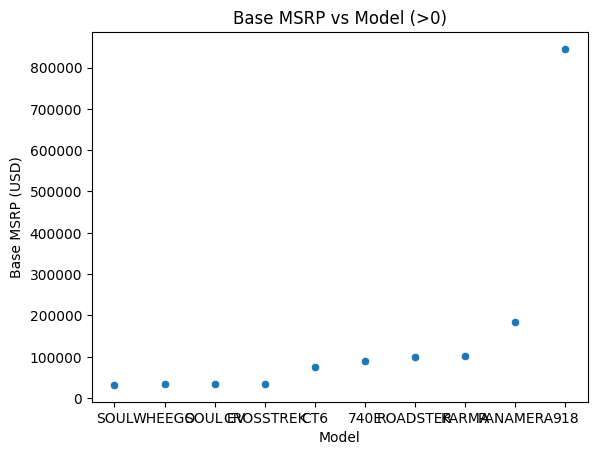

In [598]:
# Scatter plot in ascending order of base MSRP by every model with data that cotains a base MSRP over 0
# Done to get a more specific and accurate representation for the base MSRP of some of these cars
prices = df.loc[df['Base MSRP'] > 0]
prices = prices.sort_values(["Base MSRP"], ascending=True, ignore_index=False).reset_index(drop=True)
plt.title("Base MSRP vs Model (>0)")
plt.ylabel("Base MSRP (USD)")
sns.scatterplot(data=prices, x= "Model", y= "Base MSRP")

In [599]:
# To get exact values and model for least expensive car
print(prices.head(1))

   VIN (1-10)  Model Year Make Model           Electric Vehicle Type  \
0  KNDJX3AE6G        2016  KIA  SOUL  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              93   

   Base MSRP  2020 Census Tract  
0      31950       5.303509e+10  


In [600]:
# To get exact values and model for most expensive car
print(prices.loc[prices["Base MSRP"] > 800000])

   VIN (1-10)  Model Year     Make Model  \
9  WP0CA2A13F        2015  PORSCHE   918   

                    Electric Vehicle Type  \
9  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
9             Not eligible due to low battery range              12   

   Base MSRP  2020 Census Tract  
9     845000       5.303302e+10  


In [601]:
# Sorting the dataset to base MSRP in descending order
df = df.sort_values(["Base MSRP"], ascending=False, ignore_index=False).reset_index(drop=True)
# Top 5 most expensive models
expensive_models = df["Model"].head(5)

In [602]:
# Top 100 most expensive cars
print(df["Model"].head(100))

0                  918
1             PANAMERA
2                KARMA
3             ROADSTER
4                 740E
            ...       
95               OCEAN
96    HUMMER EV PICKUP
97                  I5
98           BLAZER EV
99                  I7
Name: Model, Length: 100, dtype: object


This histogram answers the second half of my first question showing the electric range of the top 5 most expensive cars with the Roadster the 4 most expensive car having the highest eletric range out of all of them at just above 200 miles which is still lower than the electric range of all of the cars in the top 5 for electric range. Even though it is the most expensive car, the 918 has a electric range of below 50 miles.

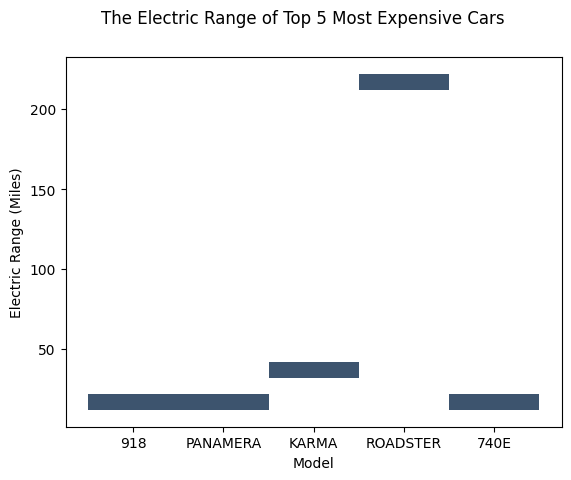

In [603]:
# Histogram camparing the electric range of the most expensive cars in the dataset
sns.histplot(data=df, x= expensive_models, y= "Electric Range", binwidth =10)
plt.suptitle("The Electric Range of Top 5 Most Expensive Cars ")
plt.ylabel("Electric Range (Miles)")
plt.show()

## Section 3: Model Year
Which car has the oldest / newest model year and how does that affect price/base MSRP?


In [604]:
df = df.sort_values(["Model Year"], ascending=False, ignore_index=False).reset_index(drop=True)

The newest car has a modle year of 2024 and is the BMW model 17

In [605]:
# Exact values for the Model and Model year of the newest car
print(df.head(1))

   VIN (1-10)  Model Year Make Model           Electric Vehicle Type  \
0  WBY53EJ03R        2024  BMW    I7  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0  Eligibility unknown as battery range has not b...               0   

   Base MSRP  2020 Census Tract  
0          0       5.303302e+10  


In [606]:
# Sorting the dataset by model year in ascending order
df = df.sort_values(["Model Year"], ascending=True, ignore_index=False).reset_index(drop=True)

The oldest car has a model year of 1997 and is the CHEVROLET S-10 PICKUP.  

In [607]:
# Exact values for the Model and Model year of the oldest car
print(df.head(1))

   VIN (1-10)  Model Year       Make        Model  \
0  1GCDE14HXV        1997  CHEVROLET  S-10 PICKUP   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              39   

   Base MSRP  2020 Census Tract  
0          0       5.306105e+10  


Here is a scatter plot of every model year by model with any of the car models sharing the same model year

<Axes: title={'center': 'Model Year vs Model'}, xlabel='Model', ylabel='Model Year'>

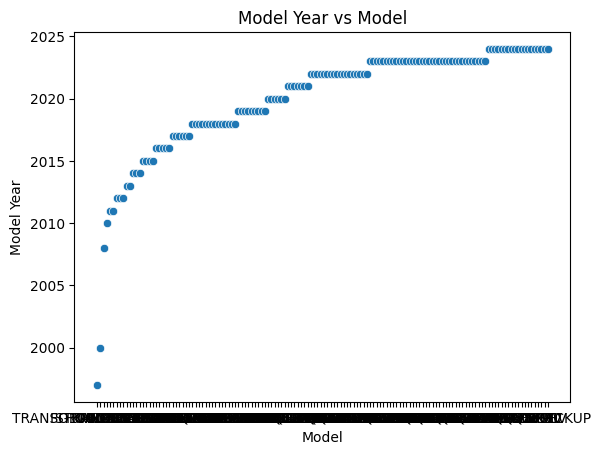

In [608]:
# Scatter plot of every model year by car model
plt.title("Model Year vs Model")
sns.scatterplot(data=df, x="Model", y="Model Year")

This scatter plot of the Base MSRP of each car by Model Year answers the second part of my question.
There seems to be no correlation with the base MSRP and model year. The most expensive car not 
being the newest and the oldest car not being the least expensive. There is also no general trend from the 
rest of the prices that would show that price increases when comparing model year. The most expensive car the being from 2015 and being far more expensive then models from years like 2016, 2018 and later on. 

<Axes: title={'center': 'Model Year vs Base MSRP'}, xlabel='Model Year', ylabel='Base MSRP (USD)'>

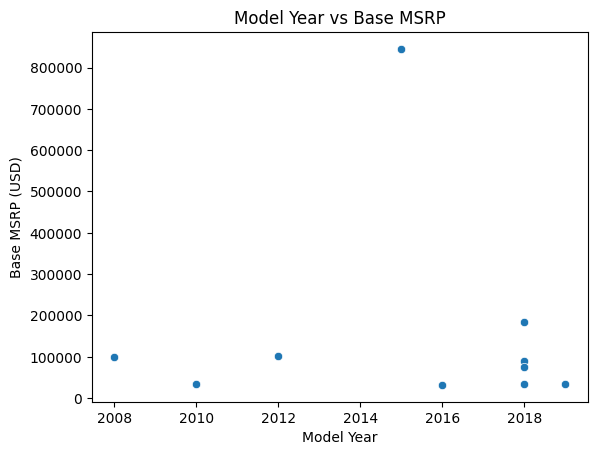

In [609]:
# Scatterplot of the Base MSRP of each car by model year
plt.title("Model Year vs Base MSRP")
plt.ylabel("Base MSRP (USD)")
sns.scatterplot(data=df.loc[df['Base MSRP'] > 0], x="Model Year", y="Base MSRP")

## What I would improve/fix?
I could have improved some of the graphs because the text would sometimes overlap making it hard to read.
I could also have improved my histograms because there seems to be a bug because the full bars are not there only rectangles. The data could have been improved becasue for columns like the base MSRP a lot of the values were 0. I also had to remove a lot of extra duplicates because they contained different values for columns that I was not looking at so they, for this project, counted as duplicates. My conclusion on model year not effecting price/base MSRP may also become inaccurate in the future due to electric cars not being around for that long with the oldest model in this dataset being from 1997 which is less than 30 years ago. Also for many of the models the base MSRP was 0 which may have affected my conclusion. 

## What further uses are there of this data?
One further use is I could also have analyzed the columns relating to the different locations. I could have also used the make column with the model column to do more comparisons.
## Would it be worth training a machine learning model on it? What predictions would you hope to make?  
I think this data could also be worth training a machine learning model to find the best or most efficiant cars by price range or location which would be very helpful for people who wanted to buy an electric vehicle and may not be as familar with the market. This data could also be worth training a machine learning model to make predictions on attributes of future models of electric cars.